Problem Statement
Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
df_boston = load_boston()

In [3]:
df_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(df_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df_boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
df_boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

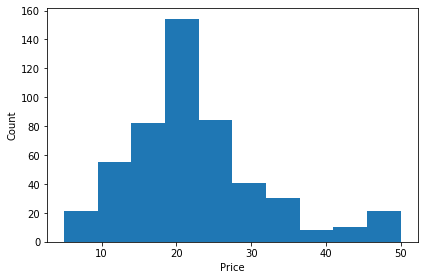

In [7]:
plt.figure(figsize = (6,4))
plt.hist(df_boston.target)
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()

In [8]:
boston_data = pd.DataFrame(df_boston.data, columns = df_boston.feature_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_data['Price'] = df_boston['target']

In [10]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


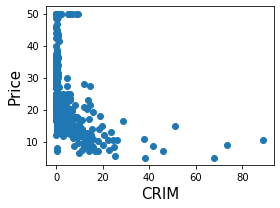

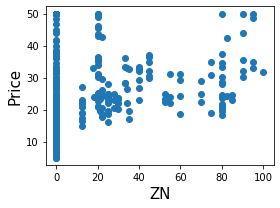

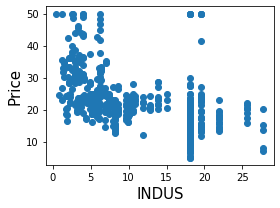

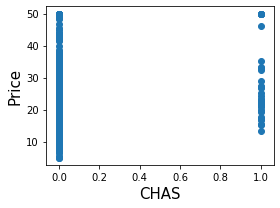

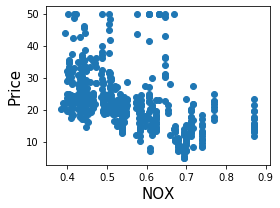

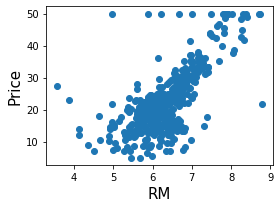

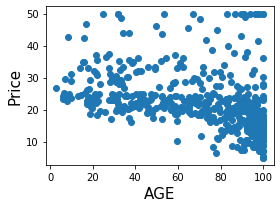

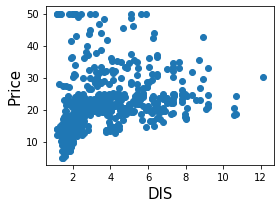

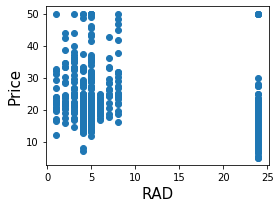

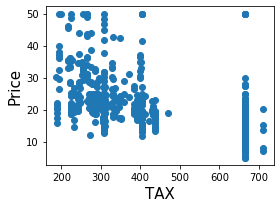

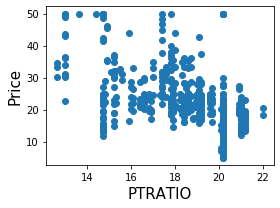

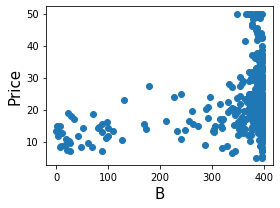

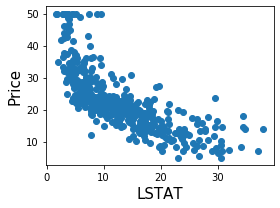

In [11]:
#Scatter plot for each feature with respect to Price

for index, feature_name in enumerate(df_boston.feature_names):
    plt.figure(figsize = (4,3))
    plt.scatter(df_boston.data[:, index], df_boston.target)
    plt.ylabel('Price', size = 15)
    plt.xlabel(feature_name, size = 15)
    plt.tight_layout()

In [12]:
#Split the dataset

X = boston_data.drop('Price', axis = 1)
y = boston_data.Price
X.shape, y.shape

((506, 13), (506,))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 0)
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test.shape  : ", y_test.shape)

X_train Shape :  (354, 13)
X_test Shape  :  (152, 13)
y_train Shape :  (354,)
y_test.shape  :  (152,)


In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X_test)

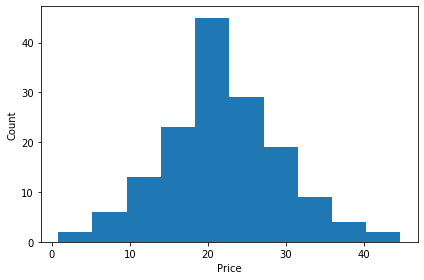

In [15]:
plt.figure(figsize= (6, 4))
plt.hist(y_pred)
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()

In [16]:
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: 36.45948838509015
Coefficient: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


(-2.500268817204301, 52.50564516129032, -2.5, 52.5)

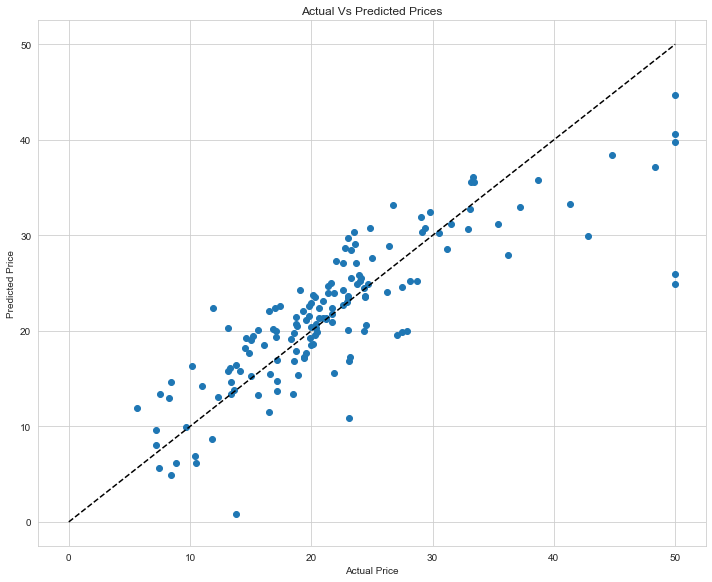

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.tight_layout()
plt.title("Actual Vs Predicted Prices")
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')

In [18]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
print("MSE :", mean_squared_error(y_pred, y_test))

MSE : 25.843003906865324


In [19]:
import statsmodels.formula.api as smf
# only include TV and Radio in the model
lm = smf.ols(formula='Price ~ CRIM + ZN +INDUS +CHAS + RM + AGE + DIS + RAD + TAX + PTRATIO', data=boston_data).fit()
lm.rsquared

0.652316576396341

In [20]:
import statsmodels.formula.api as smf
# only include TV and Radio in the model
lm = smf.ols(formula='Price ~ CRIM + ZN +INDUS +CHAS + RM + AGE + DIS + RAD + TAX + PTRATIO + B', data=boston_data).fit()
lm.rsquared

0.6689715781450243

In [21]:
import statsmodels.formula.api as smf
# only include TV and Radio in the model
lm = smf.ols(formula='Price ~ CRIM + ZN +INDUS +CHAS + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=boston_data).fit()
lm.rsquared

0.7292382183561512

In [22]:
lm.conf_int()

,0,1
Intercept,14.925016,32.074982
CRIM,-0.164691,-0.033105
ZN,0.021193,0.076218
INDUS,-0.173900,0.064009
CHAS,0.825379,4.279201
RM,3.157077,4.826024
AGE,-0.041142,0.009945
DIS,-1.597790,-0.830236
RAD,0.130475,0.393886
TAX,-0.021160,-0.006119


In [23]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          2.27e-131
Time:                        20:44:19   Log-Likelihood:                -1509.7
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5000      4.364      5.385      0.000      14.925      32.075
CRIM          -0.0989      0.033     -2.953      0.003      -0.165      -0.033
ZN             0.0487      0.014      3.478      0.001       0.021       0.076
INDUS         -0.0549      0.061     -0.908      0.365      -0.174       0.064
CHAS           2.5523      0.879      2.904      0.004       0.825       4.279
RM             3.9916      0.425      9.398      0.000       3.157       4.826
AGE           -0.0156      0.013     -1.200      0.231      -0.041       0.010
DIS           -1.2140      0.195     -6.215      0.000      -1.598      -0.830
RAD            0.2622      0.067      3.911      0.000       0.130       0.394
TAX           -0.0136      0.004     -3.563      0.000      -0.021      -0.006
PTRATIO       -0.7522      0.126     -5.966      0.000      -1.000      -0.504
B              0.0102      0.003      3.748      0.000       0.005       0.016
LSTAT         -0.5410      0.052    -10.475      0.000      -0.642      -0.440
==============================================================================
Omnibus:                      187.822   Durbin-Watson:                   1.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              911.054
Skew:                           1.577   Prob(JB):                    1.47e-198
Kurtosis:                       8.767   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""